In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
node_feats = np.array([
    [4, 3, 5],
    [2, 6, 3],
    [6, 7, 4],
    [7, 3, 5],
    [2, 6, 7]
])

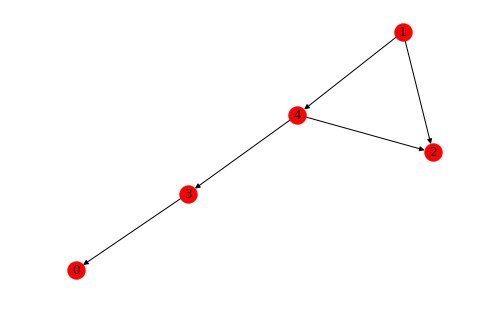

In [9]:
edges = [(1, 4), (1, 2), (4, 2), (4, 3), (3, 0)]
G_whole = nx.DiGraph()
G_whole.add_edges_from(edges)
nx.draw_kamada_kawai(G_whole, with_labels=True)
plt.show()

In [45]:
# node_indx is the same indx as G_curr and G_whole
# current_nodes is the oredereddict of current nodes
def add_children(G_curr, node_indx, current_nodes):
    # Check the children of the node to see if they need to be added to the current graph
    children = G_whole.successors(node_indx)
    for child in children:
        # Add child if not in G and check if goal
        if child not in G_curr:
            G_curr.add_node(child)
            current_nodes.update({child: len(current_nodes)})
        # If the edge doesnt exist add it
        if not G_curr.has_edge(node_indx, child):
            G_curr.add_edge(node_indx, child)

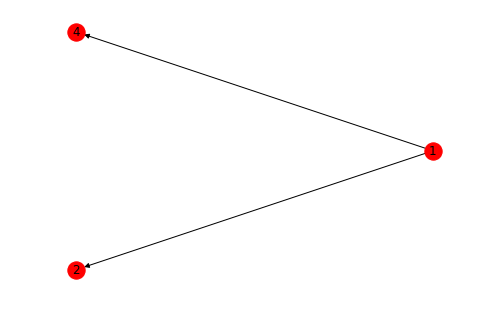

In [61]:
init_node = 1
G_curr = nx.DiGraph()
G_curr.add_node(init_node)
current_nodes = OrderedDict({init_node: 0})
add_children(G_curr, init_node, current_nodes)
nx.draw_kamada_kawai(G_curr, with_labels=True)
plt.show()

In [47]:
# current_nodes: ordereddict with keys as abs node indices, values as rel node indices (rel to the ordered dict)
def get_predecessors(G_curr, current_nodes):
    all_preds = []  # List of lists
    for node in current_nodes.keys():
        preds_abs = G_curr.predecessors(node)  # abs to all nodes, keys to the dict
        preds_rel = [current_nodes[x] for x in preds_abs]
        all_preds.append(preds_rel)
    return all_preds  # Returns a list of lists with the values being tth rel node indices

In [48]:
def _aggregate(predecessors, messages, num_nodes, message_size):
    agg = []
    # Collect all in predecessors for each node, if a node has no preds then just 0s for it
    for preds in predecessors:
        if len(preds) > 0:
            in_mess = messages[preds, :]
            assert in_mess.shape == (len(preds), message_size) or in_mess.shape == (message_size,)  # if one in-node
            agg_in_mess = np.sum(in_mess, axis=0)
            assert agg_in_mess.shape == (message_size,)
            agg.append(agg_in_mess)
        else:
            agg.append(np.zeros(shape=(message_size,)))
    stack = np.stack(agg)
    assert stack.shape == (num_nodes, message_size)
    return stack

In [49]:
current_nodes

OrderedDict([(1, 0), (4, 1), (2, 2)])

In [50]:
# Prop
current_node_states = node_feats[list(current_nodes.keys())] 
print(current_node_states)
predecessors = get_predecessors(G_curr, current_nodes)
print(predecessors)
# node_states, outputs = gnn(current_node_states, p == 0, p == num_props-1, predecessors)

[[2 6 3]
 [2 6 7]
 [6 7 4]]
[[], [0], [0]]


In [51]:
messages = np.array([
    [4, 2],
    [4, 6],
    [6, 4],
])
_aggregate(predecessors, messages, 3, 2)

array([[0., 0.],
       [4., 2.],
       [4., 2.]])

In [52]:
returned_states = np.array([
    [6, 4, 5],
    [7, 5, 5],
    [1, 7, 1]
])
new_node_feats = node_feats.copy()
new_node_feats[list(current_nodes.keys())] = returned_states

In [53]:
new_node_feats

array([[4, 3, 5],
       [6, 4, 5],
       [1, 7, 1],
       [7, 3, 5],
       [7, 5, 5]])

In [63]:
outputs = np.array([3, 6, 2])
best = np.argmax(outputs)
actual_node_idx = list(current_nodes.keys())[best]
actual_node_idx

4

In [64]:
selected_node = 4
add_children(G_curr, selected_node, current_nodes)

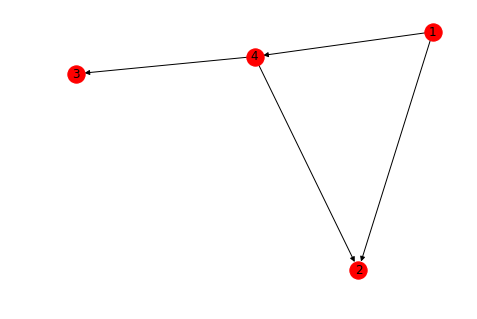

In [65]:
nx.draw_kamada_kawai(G_curr, with_labels=True)
plt.show()

In [66]:
current_nodes

OrderedDict([(1, 0), (4, 1), (2, 2), (3, 3)])